### Viz 0: upload and unzip `outputs.tar.gz`

In [ ]:
# !tar -xzvf outputs.tar.gz

### Viz 1: import modules

In [47]:
import numpy as np
import pandas as pd 

### plotting
import matplotlib.pyplot as plt

In [33]:
### set time limit
t_start = 18000
t_end = 18000+3600*2

### Viz 3: show traveler traces.

In [92]:
### not completed: output should be individual agents, not aggregated
agent_id = 13
for t in range(t_start, t_end, 600):
    traveler_locations = pd.read_csv(
        '../uregina/outputs/traveler_outputs/indiv_traveler_outputs_cptest_{}.csv'.format(t))
    traveler_locations = traveler_locations[traveler_locations['traveler_id']==agent_id]
    if traveler_locations.shape[0]>0:
      print(t)
      display(traveler_locations)

18000


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,pretrip,0,NaN,NaN,all-shahe,all-xierqi


18600


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,pretrip,0,NaN,NaN,all-shahe,all-xierqi


19200


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,pretrip,0,NaN,NaN,all-shahe,all-xierqi


19800


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,pretrip,0,NaN,NaN,all-shahe,all-xierqi


20400


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,pretrip,0,NaN,NaN,all-shahe,all-xierqi


21000


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,pretrip,0,NaN,NaN,all-shahe,all-xierqi


21600


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,platform,21520,downward-shahe,downward-xierqi,all-shahe,all-xierqi


22200


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,train,22060,321007,downward-xierqi,all-shahe,all-xierqi


22800


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,train,22060,321007,downward-xierqi,all-shahe,all-xierqi


23400


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,arrival,23200,NaN,NaN,all-shahe,all-xierqi


24000


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,arrival,23200,NaN,NaN,all-shahe,all-xierqi


24600


,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,arrival,23200,NaN,NaN,all-shahe,all-xierqi


In [91]:
### travel time
od_input = pd.read_csv('../uregina/inputs/changping_line_test_od.csv')
od_input['enter_timestamp'] = od_input['enter_hour']*3600 + od_input['enter_minute']*60 + od_input['enter_second']
od_input['exit_timestamp'] = od_input['arrival_hour']*3600 + od_input['arrival_minute']*60 + od_input['arrival_second']

od_input['boarding_time'] = t_end
od_input['alighting_time'] = t_start
for t in range(t_start, t_end, 600):
    traveler_locations = pd.read_csv(
        '../uregina/outputs/traveler_outputs/indiv_traveler_outputs_cptest_{}.csv'.format(t))
    display(traveler_locations[traveler_locations['association']=='downward-shahe'])
    break
    od_input['boarding_time'] = np.minimum(od_input['boarding_time'], 
                                       np.where(traveler_locations['traveler_status']=='train',
                                               traveler_locations['update_time'], od_input['boarding_time']))
    od_input['alighting_time'] = np.maximum(od_input['alighting_time'], 
                                       np.where(traveler_locations['traveler_status']=='arrival',
                                               traveler_locations['update_time'], od_input['alighting_time']))

display(od_input.iloc[7000:7001])

,traveler_id,origin_nid,destin_nid,departure_time,traveler_status,update_time,association,next_station,origin_station,destination_station
13,13,30,34,21383,platform,21520,downward-shahe,downward-xierqi,all-shahe,all-xierqi
39,39,30,32,21378,platform,21500,downward-shahe,downward-shengming_kexueyuan,all-shahe,all-shengming_kexueyuan
80,80,30,34,21361,platform,21500,downward-shahe,downward-xierqi,all-shahe,all-xierqi
93,93,30,34,21434,platform,21560,downward-shahe,downward-xierqi,all-shahe,all-xierqi
94,94,30,34,21275,platform,21400,downward-shahe,downward-xierqi,all-shahe,all-xierqi
...,...,...,...,...,...,...,...,...,...,...
8162,8162,30,35,21419,platform,21540,downward-shahe,downward-zhuxinzhuang,all-shahe,all-zhuxinzhuang
8184,8184,30,34,21335,platform,21460,downward-shahe,downward-xierqi,all-shahe,all-xierqi
8189,8189,30,34,21260,platform,21380,downward-shahe,downward-xierqi,all-shahe,all-xierqi
8192,8192,30,34,21444,platform,21580,downward-shahe,downward-xierqi,all-shahe,all-xierqi


,ENTRY_TIME,DEAL_TIME,TRIP_ORIGIN_LOCATION,CURRENT_LOCATION,enter_hour,enter_minute,enter_second,arrival_hour,arrival_minute,arrival_second,enter_station,exit_station,enter_timestamp,exit_timestamp,boarding_time,alighting_time
7000,2018/6/20 5:55:00,2018/6/20 6:25:15,151019041,151019049,5,55,0,6,25,15,shahe,xierqi,21300,23115,25200,18000


In [66]:
od_input[od_input['boarding_time']>1e5].head()

,ENTRY_TIME,DEAL_TIME,TRIP_ORIGIN_LOCATION,CURRENT_LOCATION,enter_hour,enter_minute,enter_second,arrival_hour,arrival_minute,arrival_second,enter_station,exit_station,enter_timestamp,exit_timestamp,boarding_time,alighting_time
7,2018/4/1 5:58:00,2018/4/1 6:09:13,151019047,151019045,5,58,0,6,9,13,shengming_kexueyuan,zhuxinzhuang,21480,22153,1000000.0,22140
24,2018/4/1 5:59:00,2018/4/1 6:09:39,151019045,151019047,5,59,0,6,9,39,zhuxinzhuang,shengming_kexueyuan,21540,22179,1000000.0,22280
34,2018/4/1 5:50:00,2018/4/1 6:02:16,151019047,151019045,5,50,0,6,2,16,shengming_kexueyuan,zhuxinzhuang,21000,21736,1000000.0,21640
35,2018/4/1 5:50:00,2018/4/1 6:02:03,151019047,151019045,5,50,0,6,2,3,shengming_kexueyuan,zhuxinzhuang,21000,21723,1000000.0,21640
98,2018/4/2 5:56:00,2018/4/2 6:07:06,151019047,151019045,5,56,0,6,7,6,shengming_kexueyuan,zhuxinzhuang,21360,22026,1000000.0,22140


Text(0, 0.5, 'simulation arrival time')

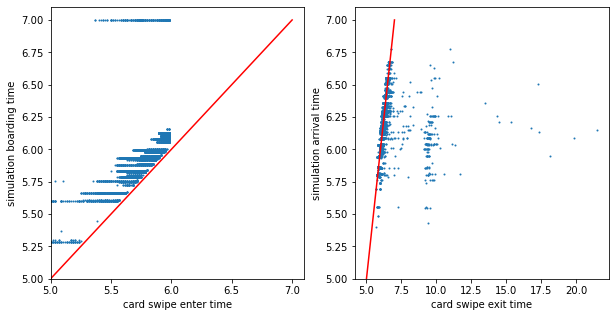

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(od_input['enter_timestamp']/3600, od_input['boarding_time']/3600, s=1)
ax[0].plot([t_start/3600, t_end/3600], [t_start/3600, t_end/3600], c='red')
ax[0].set_xlim([t_start/3600, t_end/3600+0.1])
ax[0].set_ylim([t_start/3600, t_end/3600+0.1])
ax[0].set_xlabel('card swipe enter time')
ax[0].set_ylabel('simulation boarding time')

ax[1].scatter(od_input['exit_timestamp']/3600, od_input['alighting_time']/3600, s=1)
ax[1].plot([t_start/3600, t_end/3600], [t_start/3600, t_end/3600], c='red')
# ax[1].set_xlim([t_start/3600, t_end/3600+0.1])
ax[1].set_ylim([t_start/3600, t_end/3600+0.1])
ax[1].set_xlabel('card swipe exit time')
ax[1].set_ylabel('simulation arrival time')

### Viz 4: show platform crowdness.

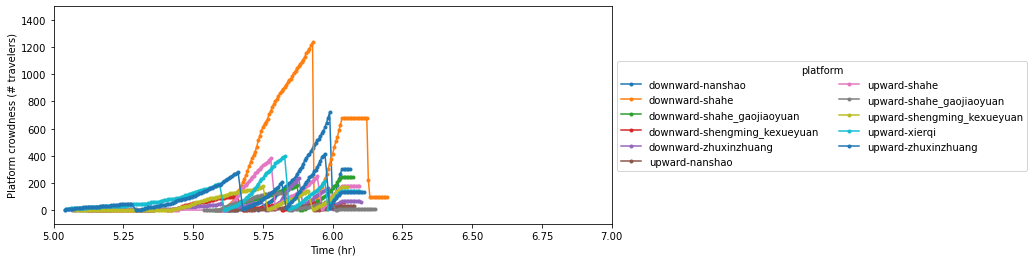

In [93]:
platform_crowdness = []
for t in range(t_start, t_end, 20):
    traveler_locations = pd.read_csv('../uregina/outputs/traveler_outputs/agg_traveler_outputs_cptest_{}.csv'.format(t))
    traveler_locations['time'] = t
    platform_crowdness += traveler_locations[traveler_locations['traveler_status']=='platform'].values.tolist()
platform_crowdness = pd.DataFrame(platform_crowdness, 
                                  columns=['traveler_status', 'platform_name', 'num_travelers', 'time'])

fig, ax = plt.subplots(figsize=(10, 4))
for platform_name, grp in platform_crowdness.groupby('platform_name'):
    ax.plot(grp['time']/3600, grp['num_travelers'], '.-', label=platform_name)
ax.set_xlim([t_start/3600, t_end/3600])
ax.set_ylim([-100, 1500])
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Platform crowdness (# travelers)')
fig.legend(ncol=2, bbox_to_anchor=(0.9, 0.5), loc='center left', title='platform')

### Step 5. train occupancy

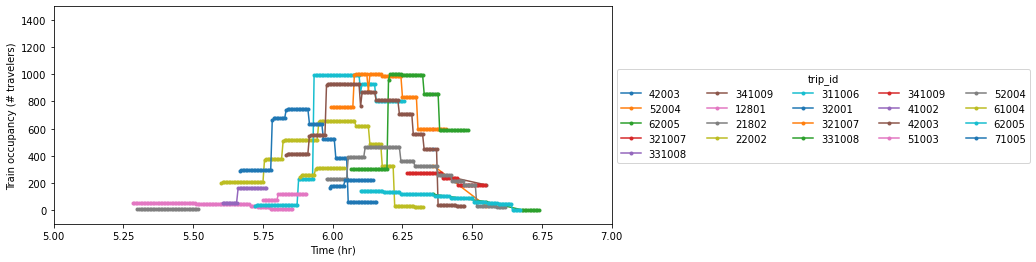

In [97]:
train_occupancy = []
for t in range(t_start, t_end, 20):
    traveler_locations = pd.read_csv('../uregina/outputs/traveler_outputs/agg_traveler_outputs_cptest_{}.csv'.format(t))
    traveler_locations['time'] = t
    train_occupancy += traveler_locations[traveler_locations['traveler_status']=='train'].values.tolist()
train_occupancy = pd.DataFrame(train_occupancy, 
                               columns=['traveler_status', 'trip_id', 'num_travelers', 'time'])


fig, ax = plt.subplots(figsize=(10, 4))
for trip_id, grp in train_occupancy.groupby('trip_id'):
    ax.plot(grp['time']/3600, grp['num_travelers'], '.-', label=trip_id)
ax.set_xlim([t_start/3600, t_end/3600])
ax.set_ylim([-100, 1500])
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Train occupancy (# travelers)')
fig.legend(ncol=5, bbox_to_anchor=(0.9, 0.5), loc='center left', title='trip_id')